# Práctica 1 - PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA EÓLICA

### Aprendizaje Automático


Jaime Ballesteros Calvo - **100454114**

Nicolás Lamotte Fresno - **100454275**

---

### GitHub
- nombre repositorio: p1_aprendizaje_automatico_Jaime_Nicolas
- usuario: NicolasLamotteUC3M
- link: https://github.com/NicolasLamotteUC3M/p1_aprendizaje_automatico_Jaime_Nicolas

---


<h1 style='text-align: center;'> NOTEBOOK 1: EDA Y SELECCIÓN DE MODELO </h1>


## Importación Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

## Análisis Exploratorio de Datos Simplificado

A continuación, vamos a explorar y visualizar los datos que vamos a utilizar para la realización de la práctica.

### Conjunto de Datos

In [3]:
wind_ava

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
4744,2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,2009-12-31 12:00:00,516.96,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,2.390276e+06,2.382632e+06,2.374982e+06,...,1.988424,2.123630,2.258837,2.394043,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


### Variable _datetime_

Inicialmente, es necesario abordar la columna datatime de manera distinta, ya que la vamos a tratar como un **índice**. Esta estrategia facilitará la manipulación de los datos durante la práctica

In [4]:
wind_ava = wind_ava.set_index('datetime')

In [5]:
wind_ava.index = pd.to_datetime(wind_ava.index)

In [6]:
wind_ava

,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,p54.162.9,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,2.505940e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,2.508339e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,2.504882e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,2.505904e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,2.501015e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,2.381615e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,2.381552e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,2.374648e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727


Con esto, podemos observar los diferentes datos que están presentes en el conjunto de datos que utilizaremos. Estos incluyen **22 variables meteorológicas**, las cuales están organizadas en una cuadrícula de 5x5 que representa 25 localizaciones. Sin embargo, para esta práctica, solo utilizaremos los datos correspondientes a la **localización 13**.

### Selección de las Variables de Interés

A continuación, eliminamos las variables que no corresponden a la localización 13.

In [7]:
for c in wind_ava.columns:
    if not c.endswith('.13') and c != 'energy':
        wind_ava.drop(c, axis = 1, inplace=True)

In [8]:
wind_ava

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


### Naturaleza de las variables y tipo de problema

Tras esto, podemos abordar varias preguntas planteadas en el enunciado. Las variables que utilizaremos son de tipo **numérico** y contamos con un total de **4748 instancias** en nuestros datos. 

Asimismo, al observar la naturaleza del objetivo final de esta práctica, que consiste en predecir ciertos valores de la variable "energía", se evidencia que se trata de un **problema de regresión**.

### Análisis Variable Objetivo

<AxesSubplot:xlabel='datetime'>

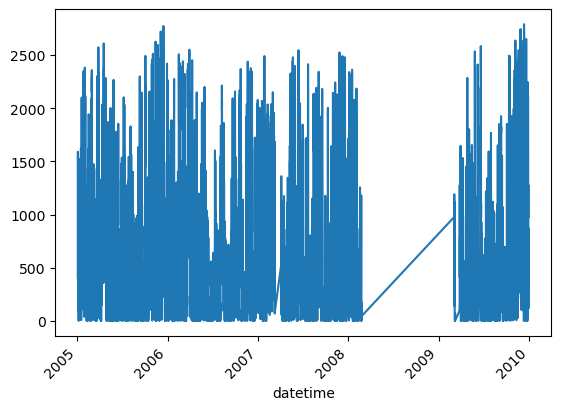

In [9]:
wind_ava['energy'].plot(rot=45)

A primera vista, podemos observar un salto temporal entre 2008 y 2009. A continuación, procederemos a identificar de manera precisa todos los saltos temporales.

In [10]:
instances_per_day = wind_ava.resample('D').size()
time_diff = wind_ava.index.to_series().diff().dt.days
missing_days = time_diff[time_diff > 1]

In [11]:
missing_days

datetime
2006-01-23 12:00:00      3.0
2007-04-04 18:00:00     24.0
2007-09-28 18:00:00      3.0
2007-12-31 12:00:00      2.0
2008-02-12 00:00:00      2.0
2009-03-05 12:00:00    373.0
2009-03-26 18:00:00     17.0
2009-06-19 12:00:00      8.0
2009-08-17 18:00:00      2.0
2009-09-27 00:00:00      2.0
2009-09-29 12:00:00      2.0
Name: datetime, dtype: float64

Tras esto, se observará que los datos abarcan hasta el 26 de febrero de 2008, y luego hay un intervalo sin registros hasta el 5 de marzo de 2009 (lo cual implica un paréntesis de 373 días antes del 5 de marzo de 2009). Aunque existen otros períodos de inactividad donde no hay datos, ninguno es tan significativo como el mencionado anteriormente.

### Valores Faltantes

In [12]:
wind_ava.isna()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 00:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 06:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 12:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-01-03 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-12-30 12:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-12-30 18:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
wind_ava.isna().sum()

energy        0
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64

Con esto se puede observar que no hay **ninguna variable faltante**. Esto significa que en los días en que se han recopilado datos, se capturan todas las variables correctamente, sin que ninguna contenga valores NaN. 

Por lo tanto, en esta etapa no eliminamos ninguna columna.

### Variables constantes

In [14]:
wind_ava.std()

energy        6.655316e+02
p54.162.13    4.482599e+04
p55.162.13    6.552216e+00
cape.13       1.217590e+02
p59.162.13    1.466953e+06
lai_lv.13     3.973773e-01
lai_hv.13     1.164342e-01
u10n.13       3.100583e+00
v10n.13       3.016766e+00
sp.13         7.136897e+02
stl1.13       6.414325e+00
u10.13        3.158104e+00
v10.13        3.058615e+00
t2m.13        6.163483e+00
stl2.13       5.547947e+00
stl3.13       4.582827e+00
iews.13       3.670135e-01
inss.13       3.790142e-01
stl4.13       3.552873e+00
fsr.13        7.602132e-03
flsr.13       9.435944e-02
u100.13       4.841730e+00
v100.13       4.667552e+00
dtype: float64

Como **ninguna variable es constante**, no se elimina ninguna variable

### Correlación de variables

In [15]:
datos_a_evaluar = wind_ava.drop(columns=['energy'])

In [16]:
datos_a_evaluar

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,95460.434452,281.680110,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,95663.765406,282.842686,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,95653.110509,282.027412,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993


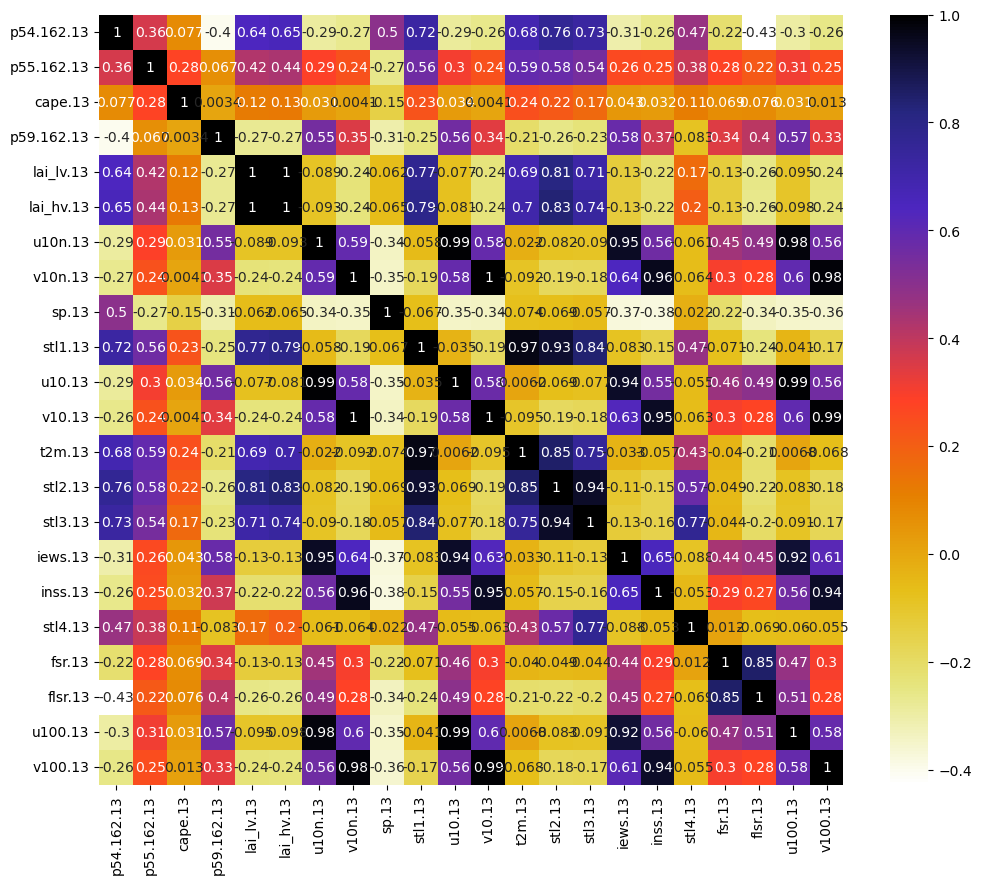

In [17]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = datos_a_evaluar.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Con esto, se puede observar que existe una correlación exacta entre lai_lv.13 y lai_hv.13, así como entre v10n.13 y v10.13, y también hay correlaciones muy cercanas a 1 en muchos casos.

Inicialmente, consideramos la posibilidad de eliminar una variable altamente correlacionada con otra cuando la correlación superaba 0.95. Sin embargo, debido a las mejoras que hemos realizado en nuestro modelo de manera **iterativa, decidimos no eliminar variables debido a la correlación**.

### Variables con valores atípicos

Ahora vamos a realizar el estudio de la media, Q1, Q2 y Q3. En estos primeros casos, no hay valores atípicos, ya que no hay valores fuera de los cuartiles

Hay algunos plot que se harán de manera individual y otros en un subplot, dependiendo de como se visualizan estos según sus ejes 

In [18]:
datos_filtrados = wind_ava

<AxesSubplot:>

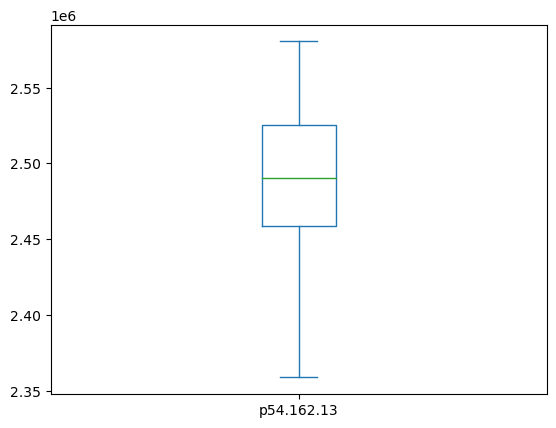

In [19]:
datos_filtrados['p54.162.13'].plot.box()

<AxesSubplot:>

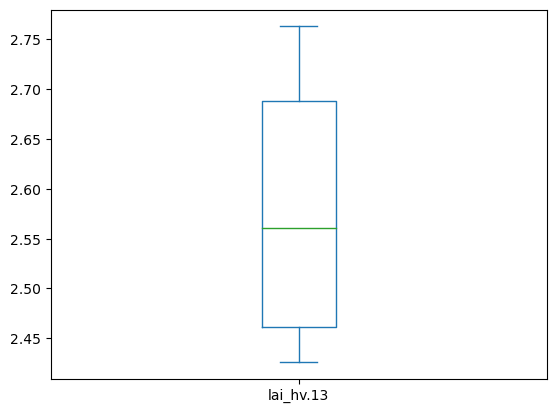

In [20]:
datos_filtrados['lai_hv.13'].plot.box()

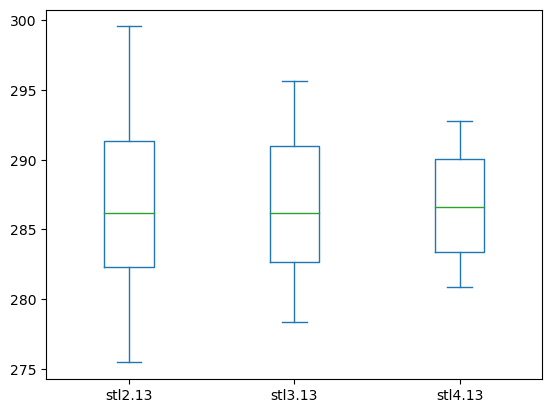

In [21]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar los diagramas de caja para las tres series en el mismo subgráfico
datos_filtrados[['stl2.13', 'stl3.13', 'stl4.13']].plot.box(ax=ax)

# Mostrar el gráfico
plt.show()

Ahora vamos a analizar el resto de variables de variables 

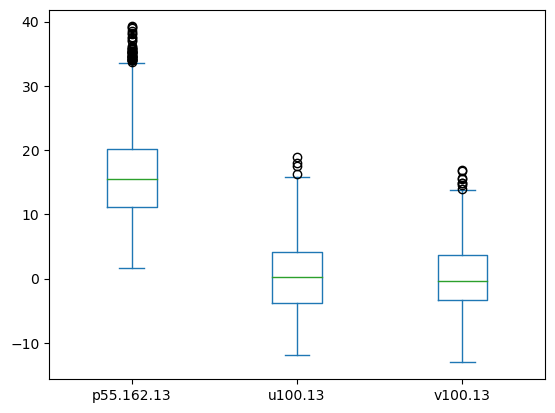

In [22]:
# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar los diagramas de caja para las tres series en el mismo subgráfico
datos_filtrados[['p55.162.13', 'u100.13', 'v100.13']].plot.box(ax=ax)

# Mostrar el gráfico
plt.show()

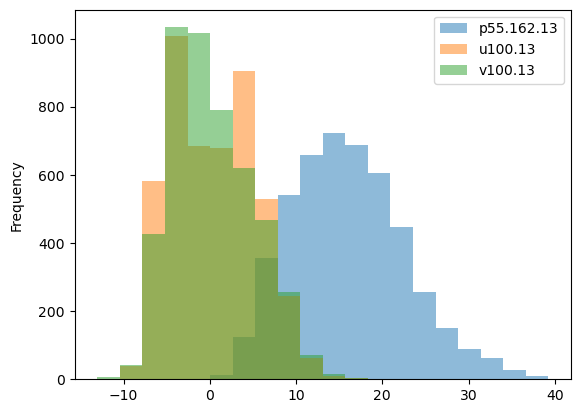

In [23]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar histogramas para las tres series en el mismo subgráfico
datos_filtrados[['p55.162.13', 'u100.13', 'v100.13']].plot.hist(alpha=0.5, bins=20, ax=ax)

# Mostrar el gráfico
plt.show()

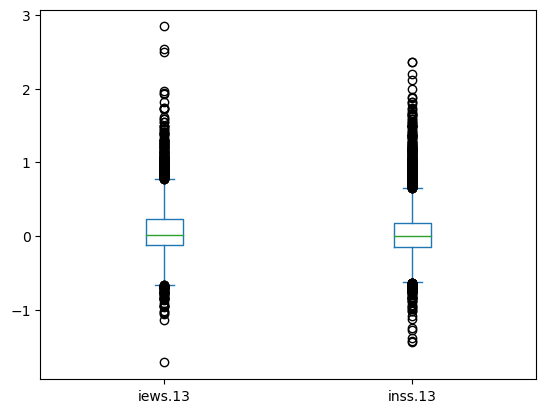

In [24]:
# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar los diagramas de caja para las tres series en el mismo subgráfico
datos_filtrados[['iews.13', 'inss.13']].plot.box(ax=ax)

# Mostrar el gráfico
plt.show()

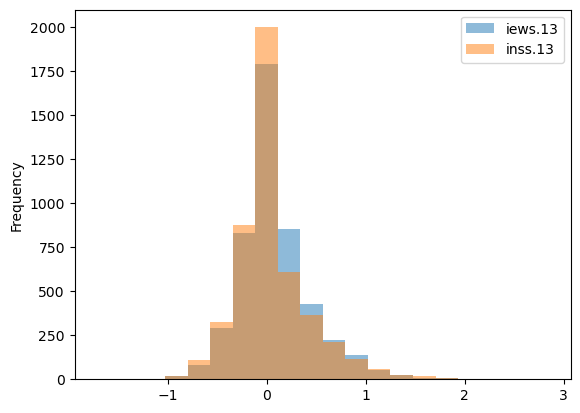

In [25]:
# Crear una figura y ejes para subgráficos
fig, ax = plt.subplots()

# Trazar histogramas para las tres series en el mismo subgráfico
datos_filtrados[['iews.13', 'inss.13']].plot.hist(alpha=0.5, bins=20, ax=ax)

# Mostrar el gráfico
plt.show()

<AxesSubplot:>

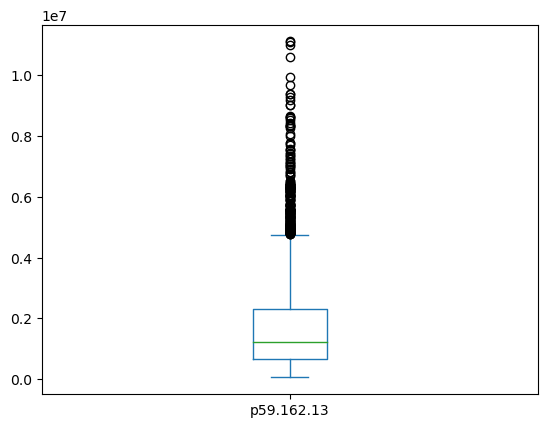

In [26]:
datos_filtrados['p59.162.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

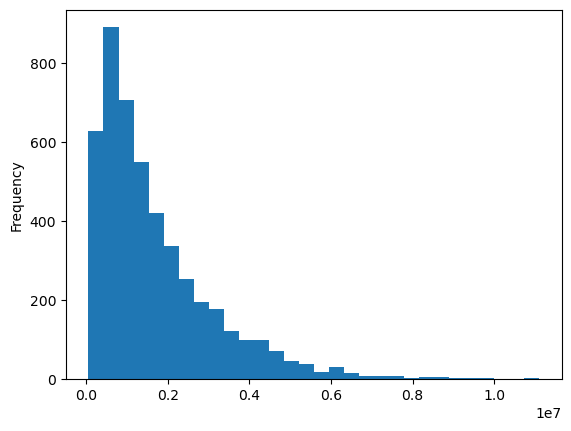

In [27]:
datos_filtrados['p59.162.13'].plot.hist(bins = 30)

<AxesSubplot:>

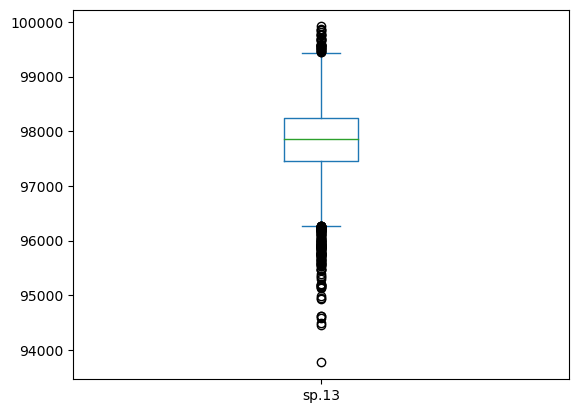

In [28]:
datos_filtrados['sp.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

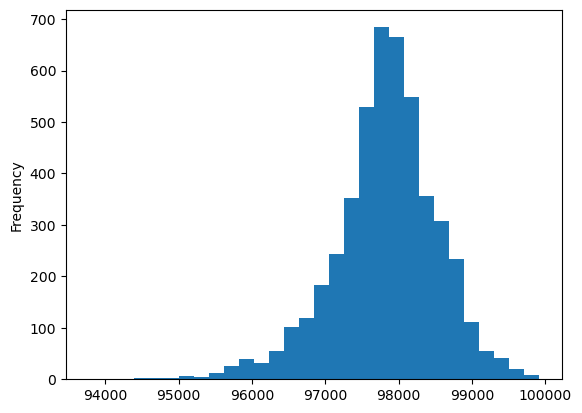

In [29]:
datos_filtrados['sp.13'].plot.hist(bins = 30)

<AxesSubplot:>

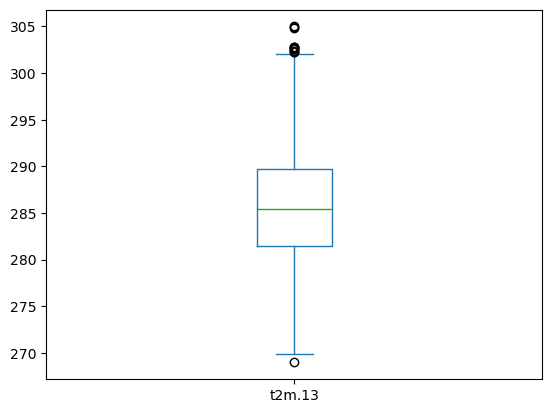

In [30]:
datos_filtrados['t2m.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

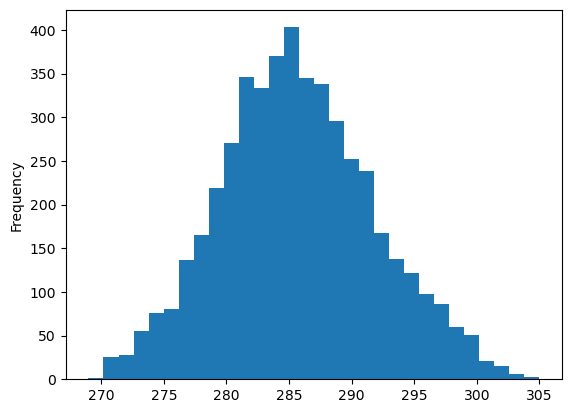

In [31]:
datos_filtrados['t2m.13'].plot.hist(bins = 30)

<AxesSubplot:>

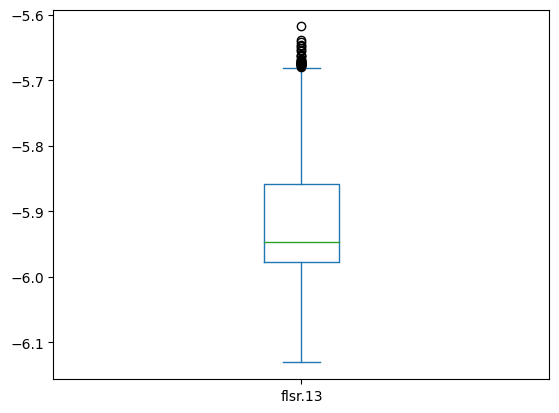

In [32]:
datos_filtrados['flsr.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

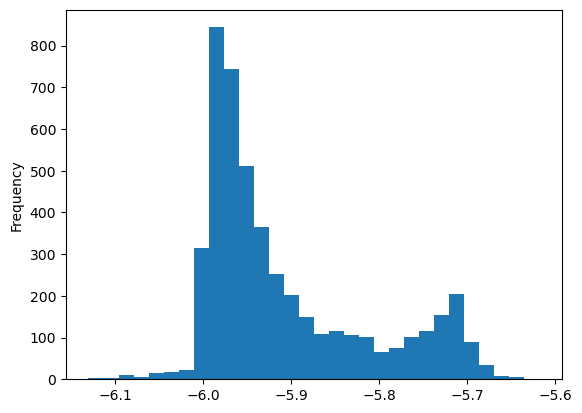

In [33]:
datos_filtrados['flsr.13'].plot.hist(bins = 30)

<AxesSubplot:>

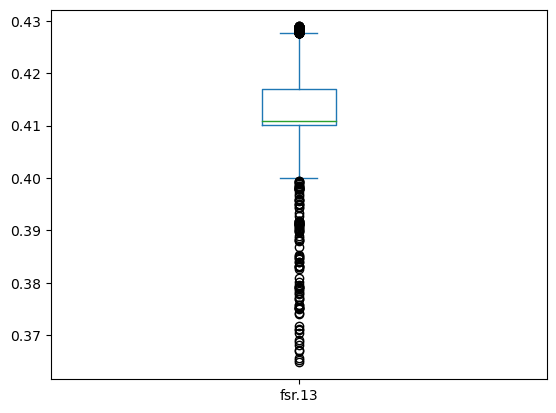

In [34]:
datos_filtrados['fsr.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

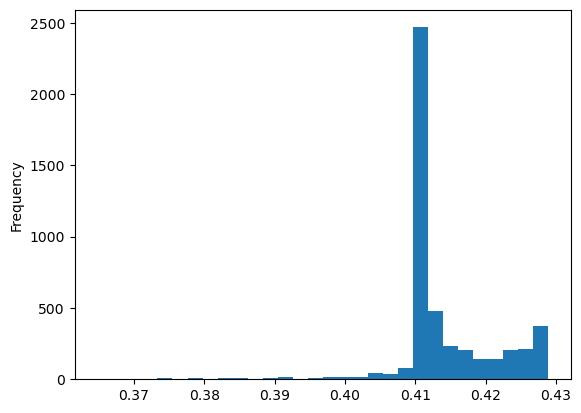

In [35]:
datos_filtrados['fsr.13'].plot.hist(bins = 30)

<AxesSubplot:>

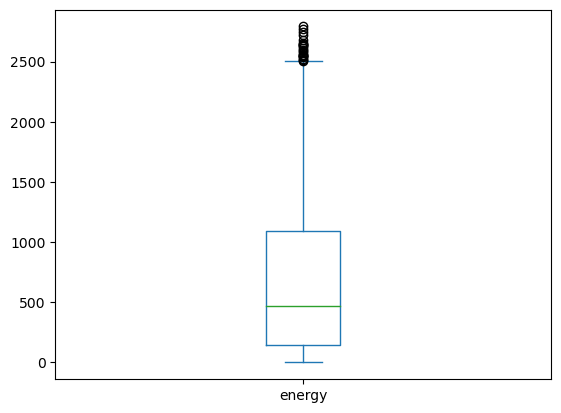

In [36]:
datos_filtrados['energy'].plot.box()

<AxesSubplot:ylabel='Frequency'>

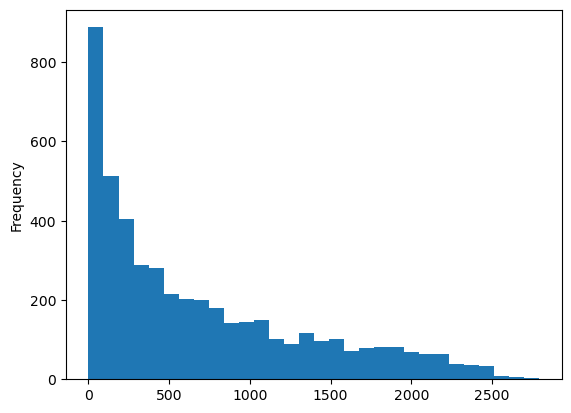

In [37]:
datos_filtrados['energy'].plot.hist(bins = 30)

Tras todas estas gráficas, se observa que aunque haya valores fuera de los Q1 y Q3, se puede observar que estos valores son significativos ya que siguen una distribución (exponencial, normal, etc; dependiendo de la variable)

Viendo estos datos, si que hay una variable que pensamos que es mejor modificarla, la cual es cape.13. Esta variable es una medida de la cantidad de energía disponible en la atmósfera para alimentar el desarrollo vertical de tormentas convectivas, lo que indica la capacidad de la atmósfera para producir movimientos ascendentes de aire que pueden llevar a la formación de tormentas. Debido a ello, sus valores pueden ser 0, que no va a haber tormentas, u otro valor; por lo que la consideramos una variable relevante

<AxesSubplot:>

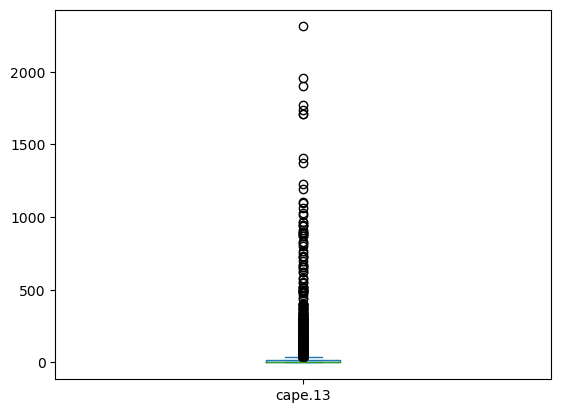

In [38]:
datos_filtrados['cape.13'].plot.box()

<AxesSubplot:ylabel='Frequency'>

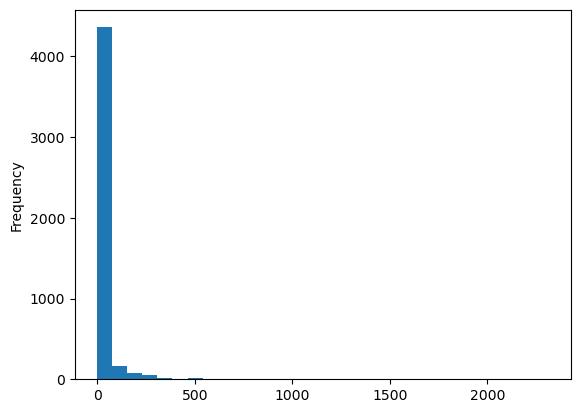

In [39]:
datos_filtrados['cape.13'].plot.hist(bins = 30)

Como se puede observar, si se pone en logaritmo y se mueve el 0, se observa pueden observar cuantos datos hay de una mejor manera

<AxesSubplot:ylabel='Frequency'>

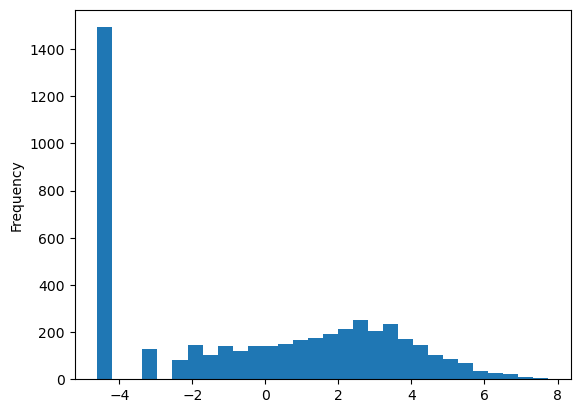

In [40]:
np.log(datos_filtrados['cape.13']+10e-3).plot.hist(bins = 30)

Como se ha visto, la variable es relevante, por lo que no podemos eliminarla, si no que vamos  a transformarla. Para ello, a los valores distintos de 0, se les asignaría 1, haciendo que la variable cape.13 solo tuviera dos valores, 0 o 1. Al realizar este trabajo de forma recursiva, observamos que no mejora los resultados. Por lo tanto, **obtamos por no aplicar esta transformación**.

In [41]:
#datos_filtrados['cape.13'] = datos_filtrados['cape.13'].apply(lambda x: 1 if x != 0 else 0)

In [42]:
#datos_filtrados['cape.13']

In [43]:
#datos_filtrados['cape.13'].plot.box()

### ANALISIS INFORMACIÓN VARIABLES

Dentro de la lista de features proprocionados, aquellos que podrían tener menos sentido de cara a utilizarlos en el entrenamiento podrían ser aquellos que no están directamente relacionados con la generación de energía eólica en el parque de Sotavento o que tienen una relación indirecta y débil con la misma. 

Después de analizarlos y de mejorar nuestro modelo de forma iterativa, hemos decidido eliminar las siguientes variables:
- **lai_hv** y **lai_lv**: Estos atributos representan el índice de área foliar para vegetación alta y baja respectivamente. Aunque la vegetación puede afectar el viento y, por lo tanto, potencialmente la generación de energía eólica, su influencia es indirecta y difícil de modelar con precisión.


- **stl3** y  **stl4**: La temperatura del suelo puede influir en la atmósfera y, por lo tanto, en las condiciones de viento. Sin embargo, la relación entre la temperatura del suelo y la generación de energía eólica puede ser compleja y depender de múltiples factores, lo que dificulta su incorporación al modelo.


- **fsr**: La rugosidad de la superficie puede afectar la velocidad y la dirección del viento, lo que a su vez puede influir en la generación de energía eólica pero es difícil medir su impacto en la generación de energía eólica.


- **p54.13**, **p59.162** y **p55.162**: Estos atributos representan integrales verticales de diferentes variables meteorológicas. Su relación directa con la generación de energía eólica en el parque de Sotavento no es clara y directa.

In [44]:
wind_ava.drop(columns=['lai_hv.13'], inplace=True)
wind_ava.drop(columns=['lai_lv.13'], inplace=True)

wind_ava.drop(columns=['stl3.13'], inplace=True)
wind_ava.drop(columns=['stl4.13'], inplace=True)

wind_ava.drop(columns=['fsr.13'], inplace=True)

wind_ava.drop(columns=['p54.162.13'], inplace=True)
wind_ava.drop(columns=['p59.162.13'], inplace=True)
wind_ava.drop(columns=['p55.162.13'], inplace=True)

In [45]:
wind_ava

,energy,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,13.527577,-0.757587,-1.922799,99846.319914,280.960661,-0.906454,-2.709511,280.473098,281.042026,-0.057958,-0.138650,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,6.896412,-1.412620,-1.403011,99917.733093,279.296651,-1.653843,-1.641837,278.286616,280.747406,-0.103576,-0.083050,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,4.774439,-2.290185,-0.754580,99764.378681,278.233956,-2.580356,-0.793682,277.206490,280.114863,-0.165721,-0.036241,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,0.000000,-3.497855,1.271028,99672.670459,280.787263,-3.365262,1.227559,280.926600,279.991138,-0.275550,0.098192,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,0.000000,-0.971249,0.553060,99372.811211,279.583112,-2.242707,1.320793,277.363875,280.576898,-0.056553,0.041844,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,24.971074,4.595786,5.563189,95460.434452,281.680110,4.645265,5.621756,280.731326,282.643490,0.628948,0.879581,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,60.248874,4.894838,5.577096,95663.765406,282.842686,4.876985,5.562963,283.310687,282.370909,0.740926,0.699769,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,3.145067,0.958361,0.948029,95653.110509,282.027412,1.302978,1.425508,281.060085,282.425812,0.109802,0.125174,-5.866856,3.033799,3.568993


## Conjunto Final de Datos ##########################################

In [46]:
wind_ava

,energy,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,
2005-01-02 18:00:00,402.71,13.527577,-0.757587,-1.922799,99846.319914,280.960661,-0.906454,-2.709511,280.473098,281.042026,-0.057958,-0.138650,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,696.80,6.896412,-1.412620,-1.403011,99917.733093,279.296651,-1.653843,-1.641837,278.286616,280.747406,-0.103576,-0.083050,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,1591.15,4.774439,-2.290185,-0.754580,99764.378681,278.233956,-2.580356,-0.793682,277.206490,280.114863,-0.165721,-0.036241,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,1338.62,0.000000,-3.497855,1.271028,99672.670459,280.787263,-3.365262,1.227559,280.926600,279.991138,-0.275550,0.098192,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,562.50,0.000000,-0.971249,0.553060,99372.811211,279.583112,-2.242707,1.320793,277.363875,280.576898,-0.056553,0.041844,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,1280.13,24.971074,4.595786,5.563189,95460.434452,281.680110,4.645265,5.621756,280.731326,282.643490,0.628948,0.879581,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,855.00,60.248874,4.894838,5.577096,95663.765406,282.842686,4.876985,5.562963,283.310687,282.370909,0.740926,0.699769,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,117.06,3.145067,0.958361,0.948029,95653.110509,282.027412,1.302978,1.425508,281.060085,282.425812,0.109802,0.125174,-5.866856,3.033799,3.568993


Tras toda la limpieza, se puede concluir que nuestro conjunto de datos filtrado contiene:
- 1 variable objetivo
- 14 features
- 4748 instancias

## Evaluación Outer / Inner

### Split de Datos

A continuación, vamos a definir cómo se va a llevar a cabo la evaluación outer y inner.

Dado que hemos observado anteriormente que hay un período sin datos entre el 25-02-2008 y el 05-03-2009, utilizaremos los datos hasta la primera fecha mencionada como conjunto de entrenamiento y los datos a partir del 5 de marzo de 2009 como conjunto de test. De esta manera, el conjunto de entrenamiento está compuesto por 3827 instancias, mientras que el conjunto de prueba está compuesto por 921 instancias, lo que representa una división de 80/20 en términos de distribución de datos.

In [47]:
X = wind_ava.drop(columns=['energy'])
y = wind_ava['energy']

In [48]:
X_train = X.loc[:'2009-03-03']
y_train = y.loc[:'2009-03-03']

X_test = X.loc['2009-03-04':]
y_test = y.loc['2009-03-04':]

In [49]:
X_train

,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,
2005-01-02 18:00:00,13.527577,-0.757587,-1.922799,99846.319914,280.960661,-0.906454,-2.709511,280.473098,281.042026,-0.057958,-0.138650,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,6.896412,-1.412620,-1.403011,99917.733093,279.296651,-1.653843,-1.641837,278.286616,280.747406,-0.103576,-0.083050,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,4.774439,-2.290185,-0.754580,99764.378681,278.233956,-2.580356,-0.793682,277.206490,280.114863,-0.165721,-0.036241,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,0.000000,-3.497855,1.271028,99672.670459,280.787263,-3.365262,1.227559,280.926600,279.991138,-0.275550,0.098192,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,0.000000,-0.971249,0.553060,99372.811211,279.583112,-2.242707,1.320793,277.363875,280.576898,-0.056553,0.041844,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-02-24 00:00:00,0.000000,0.616428,0.865628,97914.485585,282.814800,1.358885,1.949778,284.041069,283.471287,0.033773,0.081090,-5.929224,2.533687,3.353960
2008-02-24 06:00:00,17.809416,0.129590,0.402165,97834.193324,282.514650,0.142907,1.380282,282.631601,283.084260,0.003857,0.019154,-5.879858,1.326827,1.044971
2008-02-24 12:00:00,9.852017,-1.654745,0.352099,97965.730567,284.013881,-1.511501,0.306694,284.997036,283.030517,-0.062917,0.035643,-5.689764,-2.036895,0.715686


In [50]:
X_test

,cape.13,u10n.13,v10n.13,sp.13,stl1.13,u10.13,v10.13,t2m.13,stl2.13,iews.13,inss.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,
2009-03-05 12:00:00,2.273542,5.111827,-7.908876,96892.122835,281.026572,5.055740,-7.826276,280.950499,280.073879,0.912900,-1.280752,-5.881434,7.184308,-10.838239
2009-03-05 18:00:00,1.515695,4.315586,-4.856905,97197.309532,281.096540,4.344029,-4.888346,280.260920,280.720728,0.611511,-0.674134,-5.864654,6.562830,-7.670114
2009-03-06 00:00:00,1.402018,2.649172,-1.331388,97346.858624,279.776283,2.763183,-1.384746,279.769530,280.538234,0.199549,-0.167948,-5.725873,4.395505,-3.332029
2009-03-06 06:00:00,31.640132,3.026592,-0.421498,97408.251126,280.021169,3.144234,-0.433615,280.604835,280.368499,0.203268,-0.128020,-5.689463,4.967808,-2.258858
2009-03-06 12:00:00,3.069282,4.557711,-3.029477,97643.166240,281.388071,4.545221,-3.025743,283.342747,280.544034,0.549779,-0.523689,-5.704852,6.703552,-5.073250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-30 06:00:00,24.971074,4.595786,5.563189,95460.434452,281.680110,4.645265,5.621756,280.731326,282.643490,0.628948,0.879581,-5.715421,6.922743,9.179816
2009-12-30 12:00:00,60.248874,4.894838,5.577096,95663.765406,282.842686,4.876985,5.562963,283.310687,282.370909,0.740926,0.699769,-5.732455,7.434887,7.537381
2009-12-30 18:00:00,3.145067,0.958361,0.948029,95653.110509,282.027412,1.302978,1.425508,281.060085,282.425812,0.109802,0.125174,-5.866856,3.033799,3.568993


In [51]:
y_train

datetime
2005-01-02 18:00:00     402.71
2005-01-03 00:00:00     696.80
2005-01-03 06:00:00    1591.15
2005-01-03 12:00:00    1338.62
2005-01-03 18:00:00     562.50
                        ...   
2008-02-24 00:00:00      64.34
2008-02-24 06:00:00      14.95
2008-02-24 12:00:00     171.21
2008-02-25 06:00:00       2.35
2008-02-25 18:00:00      46.62
Name: energy, Length: 3827, dtype: float64

In [52]:
y_test

datetime
2009-03-05 12:00:00     977.91
2009-03-05 18:00:00    1191.99
2009-03-06 00:00:00     795.88
2009-03-06 06:00:00     141.05
2009-03-06 12:00:00    1124.20
                        ...   
2009-12-30 06:00:00    1280.13
2009-12-30 12:00:00     855.00
2009-12-30 18:00:00     117.06
2009-12-31 12:00:00     516.96
2009-12-31 18:00:00     867.07
Name: energy, Length: 921, dtype: float64

### Evaluación Inner

Para comparar diferentes alternativas y ajustar hiperparámetros, se utiliza **GridSearchCV** con validación cruzada interna de **series temporales** (TimeSeriesSplit) sobre el conjunto de entrenamiento, utilizando la métrica de puntuación **R^2**.

- La elección de **GridSearchCV** para la evaluación interna se basa en su capacidad para explorar exhaustivamente el espacio de hiperparámetros y encontrar la combinación óptima que maximice el rendimiento del modelo.

- Se opta por utilizar la validación cruzada de **series temporales** (TimeSeriesSplit) debido a la naturaleza temporal de los datos. Esta estrategia asegura que la evaluación interna refleje adecuadamente el rendimiento del modelo en situaciones de predicción a futuro, evitando la introducción de sesgos temporales.

- La elección de la **métrica R^2** como medida de evaluación se debe a que proporciona una medida simple y fácil de entender sobre qué tan bien se ajusta el modelo a los datos. Varía entre 0 y 1, donde 1 indica un ajuste perfecto y 0 indica que el modelo no explica nada de la variabilidad en los datos.

### Evaluación Outer

El modelo con los mejores hiperparámetros seleccionados se entrena nuevamente utilizando el conjunto de entrenamiento. Esto garantiza que el modelo final esté ajustado de manera óptima para hacer predicciones sobre nuevos datos.

Se evalúa el rendimiento del modelo final utilizando el conjunto de **test**, calculando la métrica de puntuación **R^2**

Observaremos también la métrica _**Mean Squared Error**_.

## Elección Método de Escalado

### Enfoque 1: Evaluando alternativas con omisión de hyperparámetros

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

results = {}
for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    knn = KNeighborsRegressor()
    
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    results[type(scaler).__name__] = r2

print("Resultados:")
for scaler, r2 in results.items():
    print(f"Método de escalado: {scaler}, R^2: {r2}")

Resultados:
Método de escalado: StandardScaler, R^2: 0.5912637430651035
Método de escalado: MinMaxScaler, R^2: 0.5907272695219785
Método de escalado: RobustScaler, R^2: 0.5932322090901846


### Enfoque 2: Evaluando alternativas con ajuste de hiper-parámetros

In [54]:
from sklearn.model_selection import TimeSeriesSplit

inner_tss = TimeSeriesSplit(n_splits=5)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

best_scores = {}

param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

pipeline_std = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Definir GridSearchCV para StandardScaler
grid_std = GridSearchCV(pipeline_std, 
                        param_grid, 
                        scoring='r2',
                        cv=inner_tss)

grid_std.fit(X_train, y_train)
best_scores['StandardScaler'] = grid_std.best_score_

pipeline_min_max = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor())
])

# Definir GridSearchCV para MinMaxScaler
grid_min_max = GridSearchCV(pipeline_min_max, 
                           param_grid, 
                           scoring='r2',
                           cv=inner_tss)

grid_min_max.fit(X_train, y_train)
best_scores['MinMaxScaler'] = grid_min_max.best_score_

pipeline_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsRegressor())
])

# Definir GridSearchCV para RobustScaler
grid_robust = GridSearchCV(pipeline_robust, 
                           param_grid, 
                           scoring='r2', 
                           cv=inner_tss)
                           
grid_robust.fit(X_train, y_train)
best_scores['RobustScaler'] = grid_robust.best_score_

# Definir GridSearchCV para KNN sin scaler
param_grid_b = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
                           
grid_knn = GridSearchCV(KNeighborsRegressor(), 
                        param_grid_b, 
                        scoring='r2', 
                        cv=inner_tss)
                           
grid_knn.fit(X_train, y_train)
best_scores['KNN'] = grid_knn.best_score_

# Mostrar los resultados
for name, score in best_scores.items():
    print(f"{name}: {score}")

StandardScaler: 0.635718573958763
MinMaxScaler: 0.6230438403394408
RobustScaler: 0.6056455595508401
KNN: 0.06049206611392692


Escogemos el **StandardScaler** como método de escalado más apropiado.

## Evaluación de modelos

### Evaluación con hiperparámetros por omisión

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time
from sklearn.pipeline import Pipeline

scores = {}


# MODELO 1: KNN
pipeline_knn_std = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

time_start = time.time()
pipeline_knn_std.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

knn_y_pred = pipeline_knn_std.predict(X_test)
knn_r2 = r2_score(y_test, knn_y_pred)

scores['KNN'] = {'R^2': knn_r2, 'Training Time': total_time_trainning}

# MODELO 2: ÁRBOLES DE REGRESIÓN
regression_tree = DecisionTreeRegressor()

time_start = time.time()
regression_tree.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

tree_y_pred = regression_tree.predict(X_test)
tree_r2 = r2_score(y_test, tree_y_pred)

scores['Decision Tree'] = {'R^2': tree_r2, 'Training Time': total_time_trainning}

# MODELO 3: REGRESIÓN LINEAL NORMAL
linear_regression = LinearRegression()

time_start = time.time()
linear_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

linear_regression_y_pred = linear_regression.predict(X_test)
linear_regression_r2 = r2_score(y_test, linear_regression_y_pred)

scores['Linear'] = {'R^2': linear_regression_r2, 'Training Time': total_time_trainning}

# MODELO 4: LASSO
lasso_regression = Lasso(max_iter=5000)

time_start = time.time()
lasso_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

lasso_regression_y_pred = lasso_regression.predict(X_test)
lasso_regression_r2 = r2_score(y_test, lasso_regression_y_pred)

scores['Lasso'] = {'R^2': lasso_regression_r2, 'Training Time': total_time_trainning}

# MODELO 5: RIDGE
ridge_regression = Ridge()

time_start = time.time()
ridge_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

ridge_regression_y_pred = ridge_regression.predict(X_test)
ridge_regression_r2 = r2_score(y_test, ridge_regression_y_pred)

scores['Ridge'] = {'R^2': ridge_regression_r2, 'Training Time': total_time_trainning}

# MODELO 6: ELASTICNET
elasticnet_regression = ElasticNet()

time_start = time.time()
elasticnet_regression.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

elasticnet_regression_y_pred = elasticnet_regression.predict(X_test)
elasticnet_regression_r2 = r2_score(y_test, elasticnet_regression_y_pred)

scores['ElasticNet'] = {'R^2': elasticnet_regression_r2, 'Training Time': total_time_trainning}

# MODELO 7: SVM
pipeline_svm_std = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

time_start = time.time()
pipeline_svm_std.fit(X_train, y_train)
time_end = time.time()
total_time_trainning = time_end - time_start

svm_y_pred = pipeline_svm_std.predict(X_test)
svm_r2 = r2_score(y_test, svm_y_pred)

scores['SVR'] = {'R^2': svm_r2, 'Training Time': total_time_trainning}

#### Resultados

In [57]:
df = pd.DataFrame.from_dict(scores, orient='index')

df

,R^2,Training Time
KNN,0.591264,0.006498
Decision Tree,0.368702,0.048969
Linear,0.239731,0.027434
Lasso,0.234772,0.062017
Ridge,0.238876,0.009504
ElasticNet,0.125632,0.005497
SVR,0.142283,0.720599


### Evaluación con HPO

In [58]:
scores_with_hpo = {}

"""MODELO 1: KNN"""

# Hiper-parámetros
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

pipeline_knn_std = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# GridSearch
grid_search_knn = GridSearchCV(
    estimator=pipeline_knn_std,
    param_grid=param_grid_knn,
    scoring='r2',  # Using negative MSE as a score
    cv=inner_tss
)

# Entrenamiento
time_start = time.time()
grid_search_knn.fit(X_train, y_train)
time_end = time.time()
total_time_training_hpo = time_end - time_start



"""MODELO 2: Linear Regression"""

param_grid_lr = {}

pipeline_lr_std = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

grid_search_lr = GridSearchCV(
    estimator=pipeline_lr_std,
    param_grid=param_grid_lr,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_lr.fit(X_train, y_train)
time_end = time.time()
total_time_training_lr = time_end - time_start



"""MODELO 3: Lasso"""
param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

pipeline_lasso_std = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

grid_search_lasso = GridSearchCV(
    estimator=pipeline_lasso_std,
    param_grid=param_grid_lasso,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_lasso.fit(X_train, y_train)
time_end = time.time()
total_time_training_lasso = time_end - time_start



"""MODELO 4: Ridge"""
param_grid_ridge = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10]
}

pipeline_ridge_std = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

grid_search_ridge = GridSearchCV(
    estimator=pipeline_ridge_std,
    param_grid=param_grid_ridge,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_ridge.fit(X_train, y_train)
time_end = time.time()
total_time_training_ridge = time_end - time_start



"""MODELO 5: ElasticNet"""
param_grid_elasticnet = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

pipeline_elasticnet_std = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(max_iter=10000))
])

grid_search_elasticnet = GridSearchCV(
    estimator=pipeline_elasticnet_std,
    param_grid=param_grid_elasticnet,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_elasticnet.fit(X_train, y_train)
time_end = time.time()
total_time_training_elasticnet = time_end - time_start

"""MODELO 6: SVR"""
param_grid_svr = {
    'svr__C': list(range(500, 1500, 100)),
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree': [1, 2, 3, 4]
}

pipeline_svr_std = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

grid_search_svr = GridSearchCV(
    estimator=pipeline_svr_std,
    param_grid=param_grid_svr,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_svr.fit(X_train, y_train)
time_end = time.time()
total_time_training_svr = time_end - time_start



"""MODELO 7: Árboles de Decisión"""
param_grid_dt = {
    'dt__max_depth': [None, 10, 20, 30, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor())
])

grid_search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    scoring='r2',
    cv=inner_tss
)

time_start = time.time()
grid_search_dt.fit(X_train, y_train)
time_end = time.time()
total_time_training_dt = time_end - time_start

# Recopilación de resultados
scores_with_hpo = {}

scores_with_hpo['KNN'] = {'R^2': r2_score(y_test, grid_search_knn.predict(X_test)), 'Training Time': total_time_training_hpo}
scores_with_hpo['Linear'] = {'R^2': r2_score(y_test, grid_search_lr.predict(X_test)), 'Training Time': total_time_training_lr}
scores_with_hpo['Lasso'] = {'R^2': r2_score(y_test, grid_search_lasso.predict(X_test)), 'Training Time': total_time_training_lasso}
scores_with_hpo['Ridge'] = {'R^2': r2_score(y_test, grid_search_ridge.predict(X_test)), 'Training Time': total_time_training_ridge}
scores_with_hpo['ElasticNet'] = {'R^2': r2_score(y_test, grid_search_elasticnet.predict(X_test)), 'Training Time': total_time_training_elasticnet}
scores_with_hpo['SVR'] = {'R^2': r2_score(y_test, grid_search_svr.predict(X_test)), 'Training Time': total_time_training_svr}
scores_with_hpo['Decision Tree'] = {'R^2': r2_score(y_test, grid_search_dt.predict(X_test)), 'Training Time': total_time_training_dt}


#### Resultados 

In [59]:
# Crea un DataFrame a partir de los diccionarios
df = pd.DataFrame.from_dict(scores_with_hpo, orient='index')

# Imprime el DataFrame
df

,R^2,Training Time
KNN,0.614494,4.216044
Linear,0.239731,0.034999
Lasso,0.239144,1.137136
Ridge,0.239045,0.125007
ElasticNet,0.237379,2.954347
SVR,0.681113,749.602942
Decision Tree,0.552239,4.916685


### Resumen: Omisión vs HPO

In [60]:
df_without_hpo = pd.DataFrame(scores).T
df_with_hpo = pd.DataFrame(scores_with_hpo).T

summary_table = pd.concat([
    df_without_hpo[['R^2', 'Training Time']],
    df_with_hpo[['R^2', 'Training Time']] 
], axis=1, keys=['Without HPO', 'With HPO'])

summary_table

Without HPO                With HPO              
                      R^2 Training Time       R^2 Training Time
KNN              0.591264      0.006498  0.614494      4.216044
Decision Tree    0.368702      0.048969  0.552239      4.916685
Linear           0.239731      0.027434  0.239731      0.034999
Lasso            0.234772      0.062017  0.239144      1.137136
Ridge            0.238876      0.009504  0.239045      0.125007
ElasticNet       0.125632      0.005497  0.237379      2.954347
SVR              0.142283      0.720599  0.681113    749.602942

### Predicciones con métodos Triviales

In [111]:
from sklearn.metrics import r2_score

np.random.seed(100454275)

# Predicción constante
constant_prediction = np.mean(y_train)
y_pred_constant = np.full_like(y_test, constant_prediction)
r2_constant = r2_score(y_test, y_pred_constant)
print("R^2 de la predicción constante:", r2_constant)



# Predicción aleatoria
min_value = np.min(y_train)

max_value = np.max(y_train)
y_pred_random = np.random.uniform(min_value, max_value, size=len(y_test))
r2_random = r2_score(y_test, y_pred_random)
print("R^2 de la predicción aleatoria:", r2_random)

R^2 de la predicción constante: -3.880265958544626e-06
R^2 de la predicción aleatoria: -2.453674604906802


### Atributos más relevantes

In [62]:
X.columns

Index(['cape.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13', 'u10.13', 'v10.13',
       't2m.13', 'stl2.13', 'iews.13', 'inss.13', 'flsr.13', 'u100.13',
       'v100.13'],
      dtype='object')

#### Linear Regression

In [63]:
print(grid_search_lr.best_estimator_.named_steps['lr'].coef_)

[  -28.31714012 -1316.57733517   545.76971806   -43.24243838
   -49.78546796  1542.46979383 -1101.67278291   -94.72150246
    10.53185041   456.92845812    64.31872957    -4.4842881
  -570.18163547   607.87120912]


#### Lasso

In [64]:
print(grid_search_lasso.best_estimator_.named_steps['lasso'].coef_)

[  -28.32060274 -1284.02798996   508.08299151   -43.85767811
   -48.92104197  1497.09923024 -1040.36028568   -91.1366299
     7.14884746   452.26132144    69.42758784    -4.3119613
  -553.05051339   578.57131857]


#### Ridge

In [65]:
print(grid_search_ridge.best_estimator_.named_steps['ridge'].coef_)

[  -28.61509772 -1208.30557931   475.26907525   -45.04353526
   -63.41212558  1389.17580294  -989.24700898   -77.61091197
    10.01712486   443.98685615    78.7104522     -5.1633145
  -511.66904408   548.7230989 ]


### Conclusiones

#### ¿Cuál es el mejor método?

- **Antes del ajuste de hiperparámetros**, el mejor método en términos de R^2 era **KNN**, con un valor de 0.591264.
- El método con la mayor puntuación R^2 **después del ajuste de hiperparámetros** es el **SVR**, con un R^2 de 0.681113.


#### ¿Cuál de los métodos básicos de aprendizaje automático es más rápido?

- **Antes del ajuste de hiperparámetros**, el método más rápido en términos de tiempo de entrenamiento fue **Ridge Regression**, con solo 0.005502 segundos.
- **Después del ajuste de hiperparámetros**, el método más rápido fue **Linear Regression**, con 0.055198 segundos.

#### ¿Los resultados son mejores que los regresores triviales?

Sí, como podemos  observar, los resultados son significativamente mejores que los regresores triviales/naive/dummy o incluso que un modelo que simplemente predice la media de los datos.

#### ¿El ajuste de hiperparámetros mejora con respecto a los valores por omisión?

Sí, en la mayoría de los casos, **el ajuste de hiperparámetros mejora** el rendimiento del modelo en comparación con los valores por omisión.
Por ejemplo, el R^2 del SVR después del ajuste de hiperparámetros aumentó significativamente de 0.142283 (sin HPO) a 0.681113 (con HPO).

#### ¿Hay algún equilibrio entre tiempo de ejecución y mejora de resultados?

Sí, hay un equilibrio entre el tiempo de ejecución y la mejora de resultados. Por ejemplo, el SVR tuvo un aumento significativo en el R^2 después del ajuste de hiperparámetros, pero también experimentó un aumento considerable en el tiempo de entrenamiento, de 1.227959 segundos a 1270 segundos.

Es importante considerar este equilibrio al seleccionar el método de aprendizaje automático, ya que un aumento en el rendimiento del modelo podría venir con un costo significativo en términos de tiempo de entrenamiento. 
Por ejemplo, en otro contexto en el que el tiempo de entrenamiento tiene elevados costes, podría merecer más la pena utilizar el modelo KNN, por su relación Precisión/Tiempo en comparación al método SVR. 

#### ¿Es posible extraer de alguna técnica qué atributos son más relevantes?


Dado que los coeficientes de los modelos de regresión lineal, Lasso y Ridge representan la contribución de cada atributo a la predicción del modelo, podemos interpretar los coeficientes más grandes en términos absolutos como indicativos de una mayor importancia del atributo correspondiente.

En resumen, los atributos que parecen más relevantes para la predicción son **u10n y u10**. Por otro lado, **stl2 y flsr**
parecen ser los que menos contribuyen a la predicción en comparación con otros atributos. Aunque en un primer momento hemos probado a eliminarlos, hemos decidido mantenerlos ya que si son relevantes.

## Método Final

### Mejor Alternativa

In [69]:
best_model_name = max(scores_with_hpo, key=lambda x: scores_with_hpo[x]['R^2'])
best_model = None

if best_model_name == 'KNN':
    best_model = grid_search_knn
elif best_model_name == 'Linear':
    best_model = grid_search_lr
elif best_model_name == 'Lasso':
    best_model = grid_search_lasso
elif best_model_name == 'Ridge':
    best_model = grid_search_ridge
elif best_model_name == 'ElasticNet':
    best_model = grid_search_elasticnet
elif best_model_name == 'SVR':
    best_model = grid_search_svr
elif best_model_name == 'Decision Tree':
    best_model = grid_search_dt

In [70]:
best_model.best_params_

{'svr__C': 1100, 'svr__degree': 1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}

In [71]:
final_model = best_model.best_estimator_

### Rendimiento Futuro

In [72]:
predictions = final_model.predict(X_test)

score = r2_score(y_test, predictions)

In [73]:
score

0.6811126714555454

### Entrenamiento Modelo Final

In [74]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1100, degree=1, gamma='auto'))])

### Guardar el Modelo Final

In [75]:
import pickle

with open('modelo_final.pkl', 'wb') as f:
    pickle.dump(final_model, f)